In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [75]:
edges_df = pd.read_csv(edges_path)
nodes_df = pd.read_csv(nodes_path)

In [76]:
edges_df.head()

,test_state1,test_state2,agg_sum_weight
0,int_storage_rw,wifi_status,61
1,livewallpaper_usage,wifi_status,60234
2,radio_tech,sdcard_detect,34
3,ram_usage,screen_timeout,38
4,batt_charging,nfc_hw_support,23


In [77]:
edges_df['agg_sum_weight_adjusted'] = 15*edges_df['agg_sum_weight']/max(edges_df['agg_sum_weight'])

In [78]:
max(edges_df['agg_sum_weight'])

181699

In [79]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [80]:
nx.draw_networkx_edges

<function networkx.drawing.nx_pylab.draw_networkx_edges(G, pos, edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle=None, min_source_margin=0, min_target_margin=0, **kwds)>

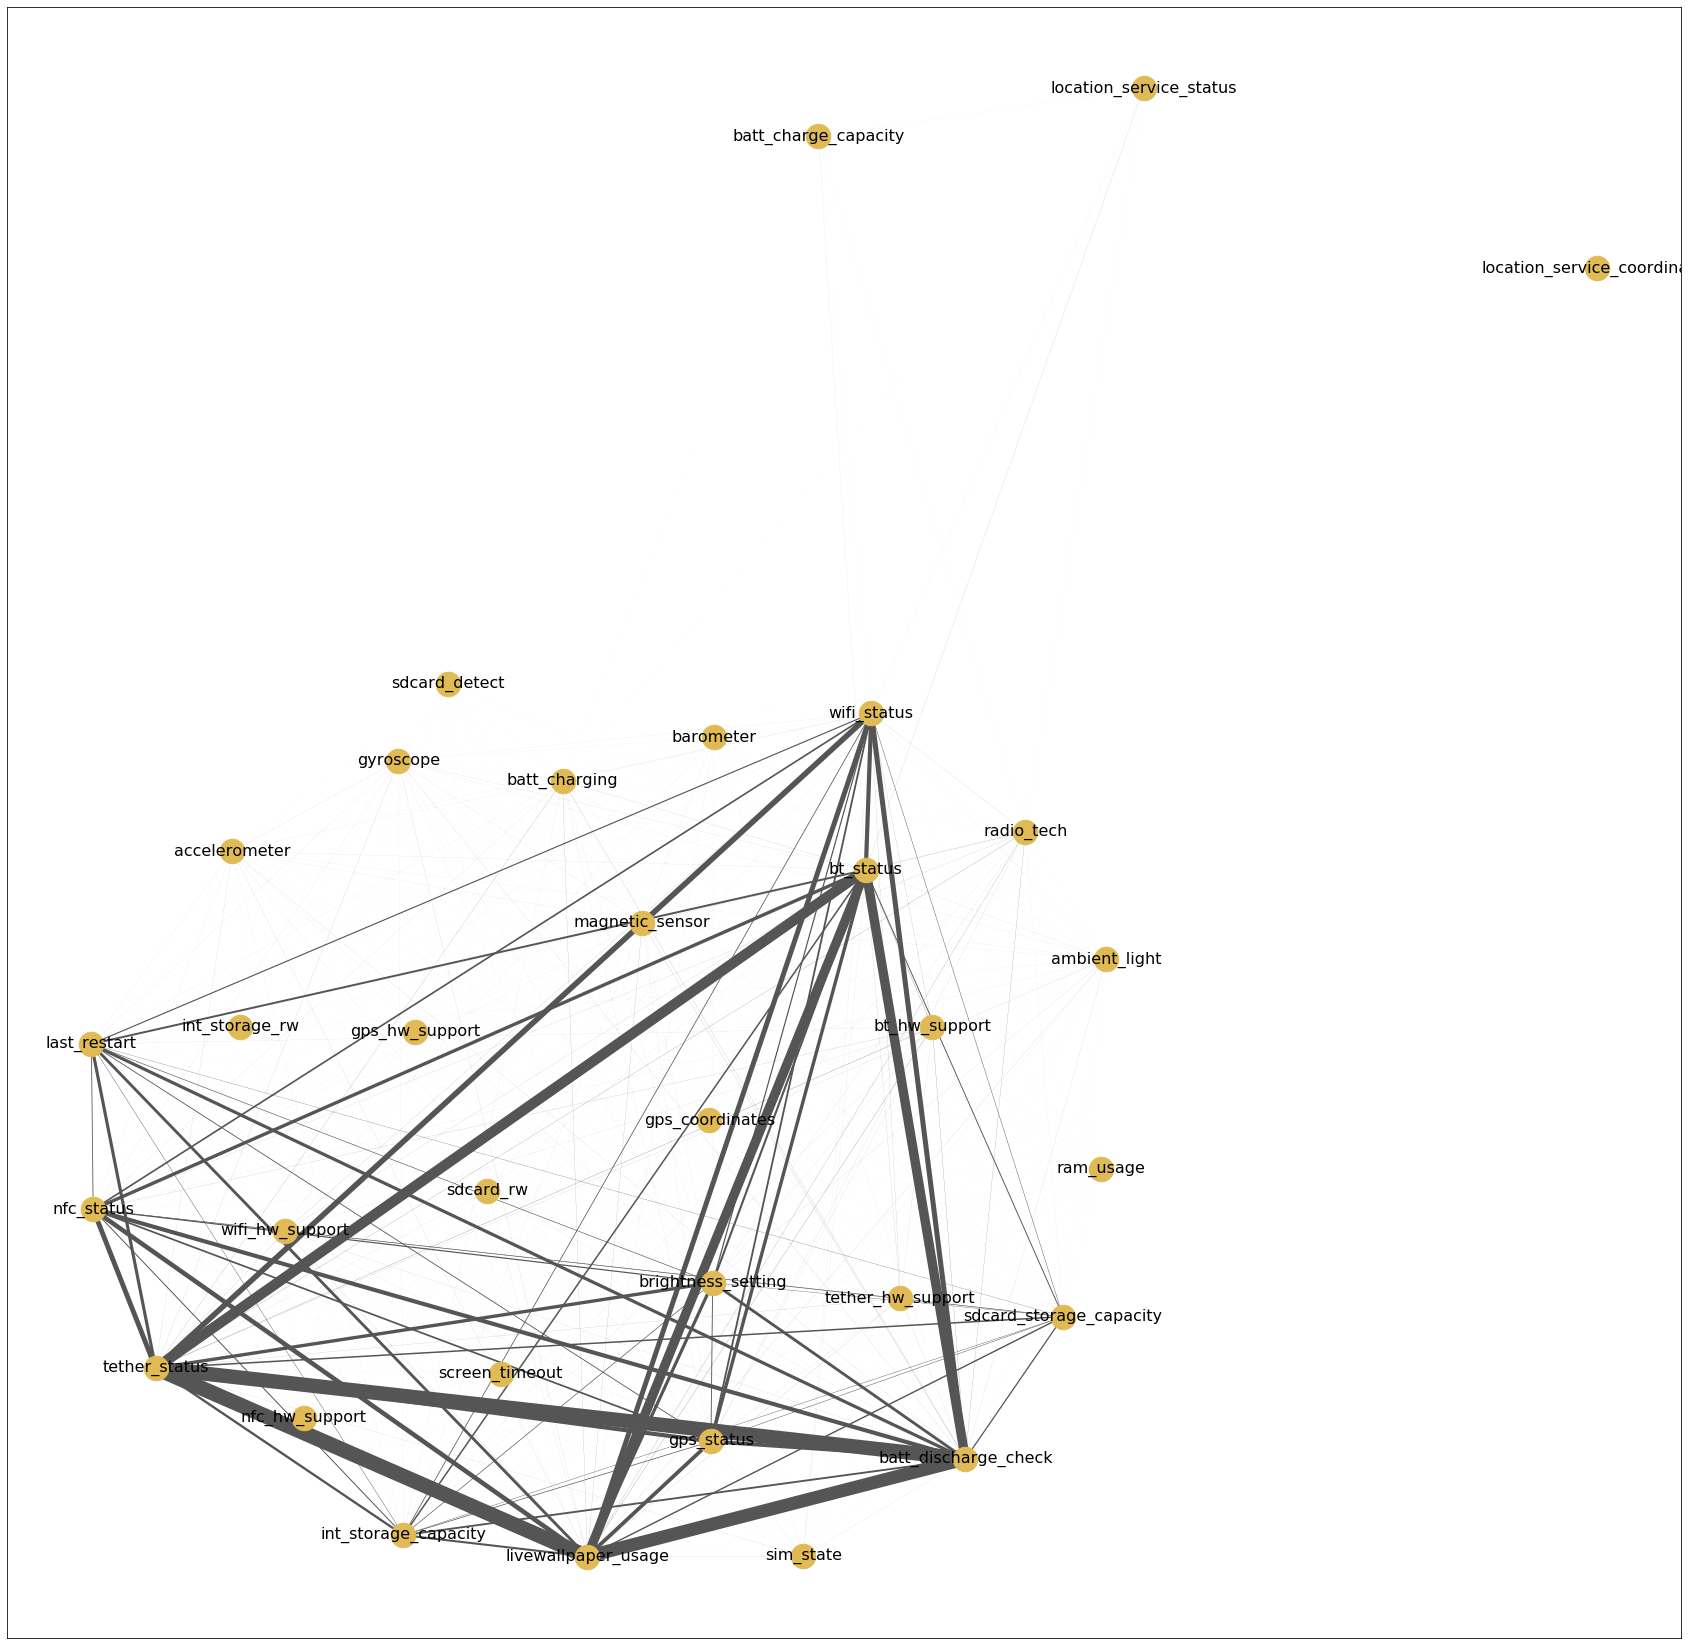

In [81]:
G = nx.from_pandas_edgelist(edges_df,'test_state1','test_state2', edge_attr='agg_sum_weight_adjusted')
durations = [i['agg_sum_weight_adjusted'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

fig, ax = plt.subplots(figsize=(30,30))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, labels=True, node_size=600, node_color='#e0bb55')
nx.draw_networkx_edges(G, pos, width=durations, ax=ax, edge_color='#555555')
_ = nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=16)
#nx.draw_networkx_edge_labels(G, pos, edge_labels=list(edges_df['agg_sum_weight'].values), ax=ax)

In [83]:
nodes_df.head()

,test_state1,index
0,accelerometer,1
1,ambient_light,2
2,barometer,3
3,batt_charge_capacity,4
4,batt_charging,5


In [84]:
node_list = [x for x in nodes_df['test_state1']]
node_list
len(node_list)

32

G = nx.from_pandas_edgelist(df,source='test_state1', target='test_state2', edge_attr=['agg_sum_weight'], create_using=nx.DiGraph())
nx.draw_circular(G, with_labels=True,width=0.12)
plt.show()  

In [85]:
G = nx.Graph(day="TestCaseNetworkAnalysis")

In [86]:
for index, row in nodes_df.iterrows():
    G.add_node(row['test_state1'],group='index')
    

In [87]:
for index, row in edges_df.iterrows():
    G.add_weighted_edges_from([(row['test_state1'], row['test_state2'], row['agg_sum_weight'])])


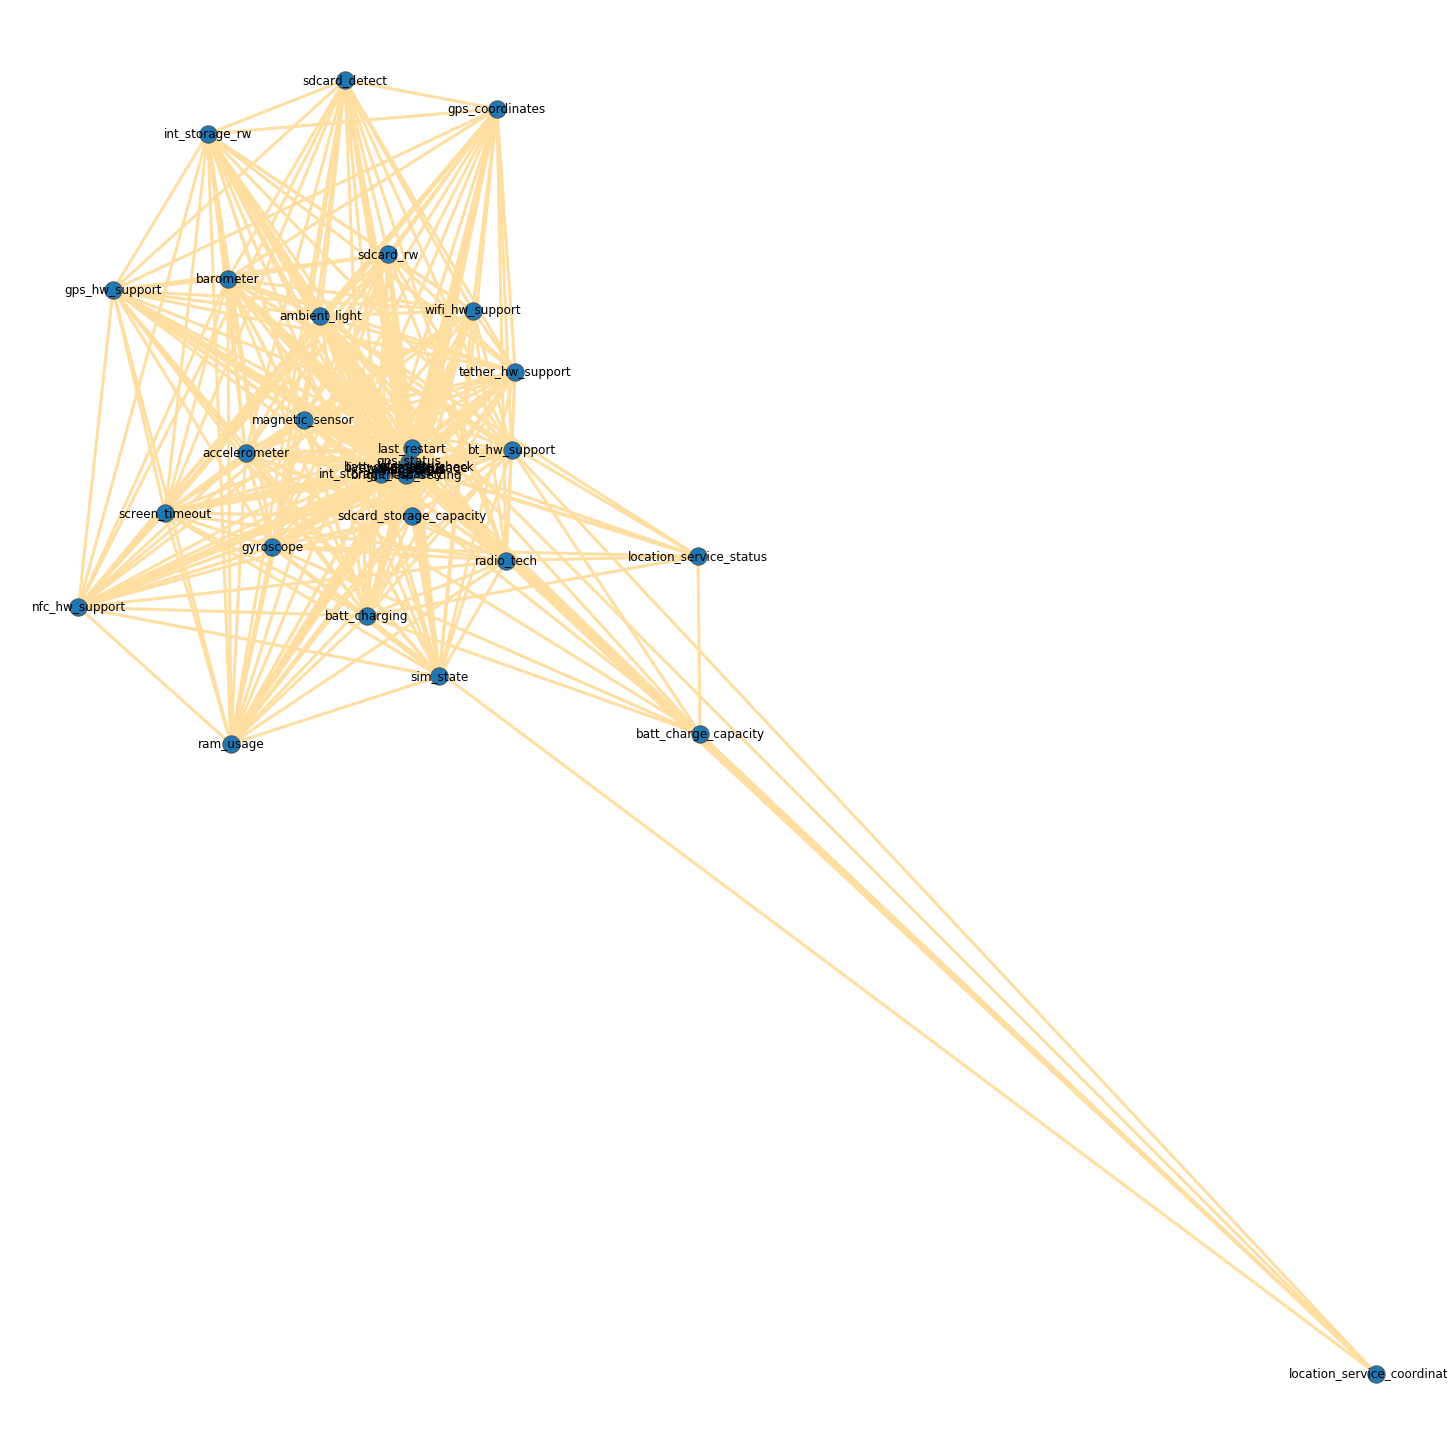

In [88]:
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(20,20))
options = {
    'edge_color': '#FFDEA2',
    'width': 3,
    'with_labels': True,
    'font_weight': 'regular',
}
#colors = [color_map[G.node[node]['group']] for node in G]
#sizes = [G.node[node]['nodesize']*10 for node in G]
nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

In [92]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = pd.DataFrame({'number':[str(i) for i in range(1,30)],'contactnumber':[str(i+1) for i in range(1,30)],
                   'callduration':[i for i in range(1,30)]})

df.head(11)

,number,contactnumber,callduration
0,1,2,1
1,2,3,2
2,3,4,3
3,4,5,4
4,5,6,5
5,6,7,6
6,7,8,7
7,8,9,8
8,9,10,9
9,10,11,10


In [93]:
G = nx.from_pandas_edgelist(df,'number','contactnumber', edge_attr='callduration')
durations = [i['callduration'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

In [96]:
G.edges

EdgeView([('1', '2'), ('2', '3'), ('3', '4'), ('4', '5'), ('5', '6'), ('6', '7'), ('7', '8'), ('8', '9'), ('9', '10'), ('10', '11'), ('11', '12'), ('12', '13'), ('13', '14'), ('14', '15'), ('15', '16'), ('16', '17'), ('17', '18'), ('18', '19'), ('19', '20'), ('20', '21'), ('21', '22'), ('22', '23'), ('23', '24'), ('24', '25'), ('25', '26'), ('26', '27'), ('27', '28'), ('28', '29'), ('29', '30')])

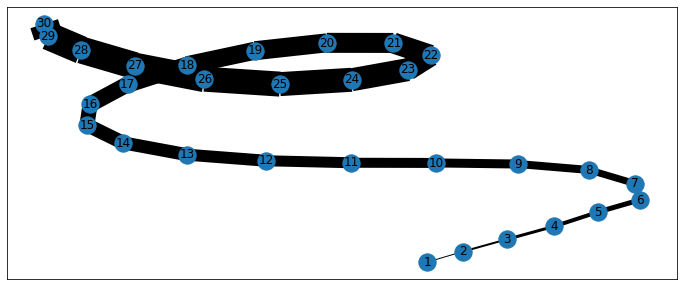

In [97]:
fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, labels=True)
nx.draw_networkx_edges(G, pos, width=durations, ax=ax)
_ = nx.draw_networkx_labels(G, pos, labels, ax=ax)

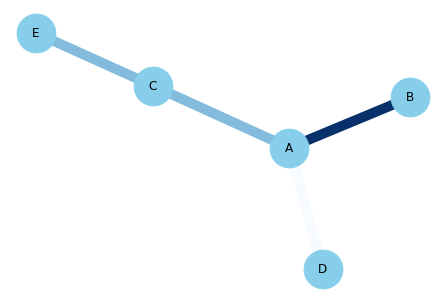

In [99]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'], 'value':[1, 10, 5, 5]})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color=df['value'], width=10.0, edge_cmap=plt.cm.Blues)